# Assignment Sesi 24
Akan menganalisis [dataset ini](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?authuser=0).

Dalam analisis ini, saya memiliki tujuan untuk melihat pengaruh gaji, gender, umur, serta bidang pekerjaan terhadap kepuasan pegawai terhadap pekerjaannya.

Saya akan melihat keterhubungan antara gender terhadap kepuasan pekerjaan, serta lainnya.

In [23]:
# Importing Needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [24]:
# Importing data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [27]:
# Checking Info Type Data of the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
# Checking Duplicated Data
df.duplicated().value_counts()

False    1470
Name: count, dtype: int64

In [26]:
# Checking Null Data
df.isnull().mean()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [28]:
for cols in df.columns:
    print(df[cols].value_counts())
    print('\n')

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6

In [29]:
# Checking Missing Values Non Null
for cols in df.columns:
    print(df[df[cols] == 'Unknown'] | df[df[cols] == 'unknown'] | df[df[cols] == 'none'] | df[df[cols] == 'None'])

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfac

### Heatmap

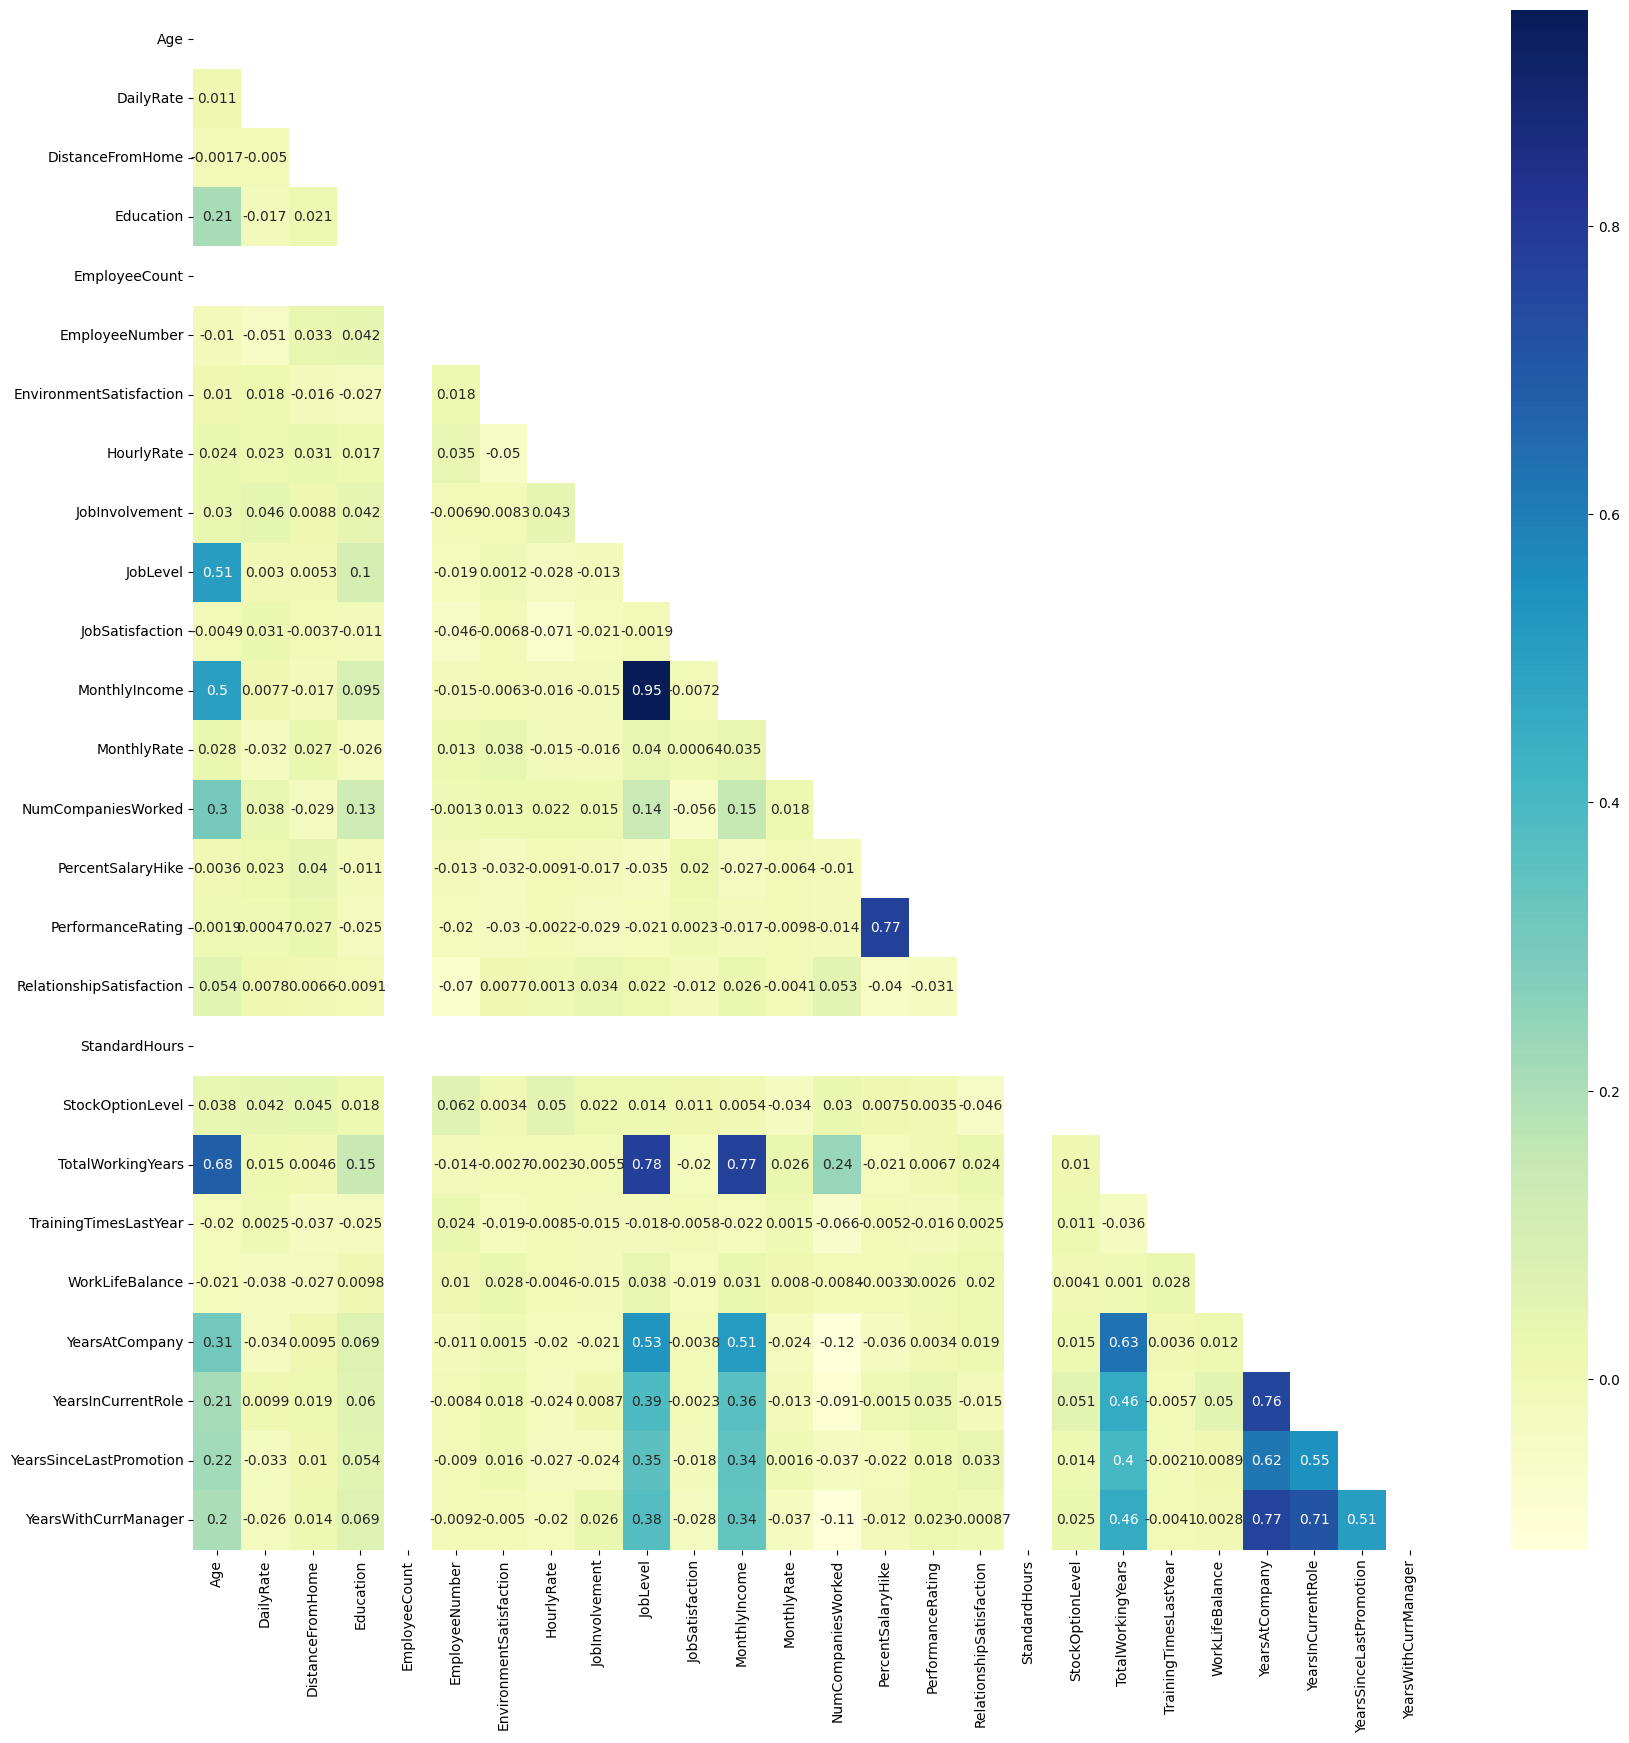

In [30]:
# Creating Heatmap of the Data
num_data= df.select_dtypes(include='number')
fig, ax = plt.subplots(figsize=(20,20))

# Triagular
mask = np.triu(np.ones_like(num_data.corr()))
# Triangle Heatmap
dataplot = sns.heatmap(num_data.corr(), cmap="YlGnBu", annot=True, mask=mask, ax=ax)

plt.show()

### Bar Chart
Chart dibawah ini akan menampilkan Keterhubungan antara Departemen yang ada pada Perusahaan terhadap kepuasan pegawai di pekerjaannya.

In [9]:
department_jobs_sat = df.groupby(['Department','JobSatisfaction'])['EmployeeCount'].count().reset_index()
department_jobs_sat

,Department,JobSatisfaction,EmployeeCount
0,Human Resources,1,11
1,Human Resources,2,20
2,Human Resources,3,15
3,Human Resources,4,17
4,Research & Development,1,192
5,Research & Development,2,174
6,Research & Development,3,300
7,Research & Development,4,295
8,Sales,1,86
9,Sales,2,86


d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



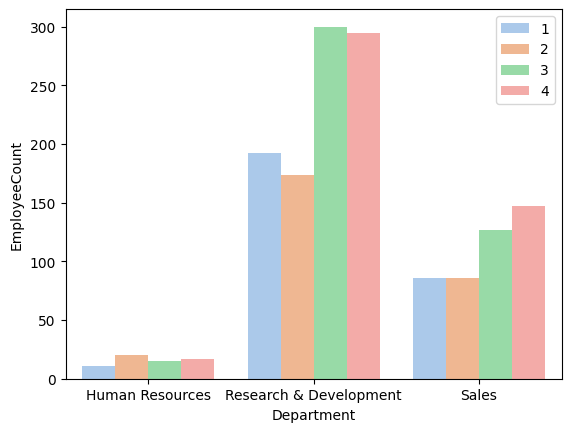

In [31]:
# Stacked Bar Chart
sns.barplot(data=department_jobs_sat, x='Department', y='EmployeeCount', orient='v', hue='JobSatisfaction', palette='pastel')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Pie Chart

Chart ini bertujuan untuk melihat persebaran Kepuasaan Pegawai atas Pekerjaannya per Degree, serta dipisahkan berdasarkan Gender

In [32]:
# Function for Outputing Index and Value of a Column
def val_counts(df, var):
    counts = df[var].value_counts().sort_index()
    labels = counts.index
    sizes = counts.values
    return labels, sizes

labels = val_counts(df, 'JobSatisfaction')[0]
values= val_counts(df, 'JobSatisfaction')[1]
colors = ['#bb2b77','#95cbee','#65dcaa','#aa3c23']

explode = (0.05, 0) # Explode the first slice

# Create an Interactive Pie Chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                             pull=explode, marker=dict(colors=colors))])

# Adjusting the position of the horizontal legend
fig.update_layout(
    title=dict(text='Job Satisfaction Distribution', x=0.5, y=0.95)
)
fig.show()

In [33]:
# Grouping Gender and Job Satisfaction
gender_jobs_sat = df.groupby(['Gender','JobSatisfaction'])['EmployeeCount'].count()
gender_jobs_sat

Gender  JobSatisfaction
Female  1                  119
        2                  118
        3                  181
        4                  170
Male    1                  170
        2                  162
        3                  261
        4                  289
Name: EmployeeCount, dtype: int64

In [34]:
# Plotting using Sub Plot to Divide Job Satisfaction per Gender
fig = plt.figure(figsize=(15,10), dpi=1600)

# First Column
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(gender_jobs_sat['Female'],autopct='%1.2f%%')
plt.title('Job Satisfaction per Gender Female')
plt.legend(gender_jobs_sat['Female'].index)

# Second
ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(gender_jobs_sat['Male'],autopct='%1.2f%%')
plt.title('Job Satisfaction per Gender Male')
plt.legend(gender_jobs_sat['Male'].index)

plt.show()

### Histogram
Chart dibawah ini untuk melihat persebaran Umur yang ada pada Perusahaan

d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\bsi80190\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

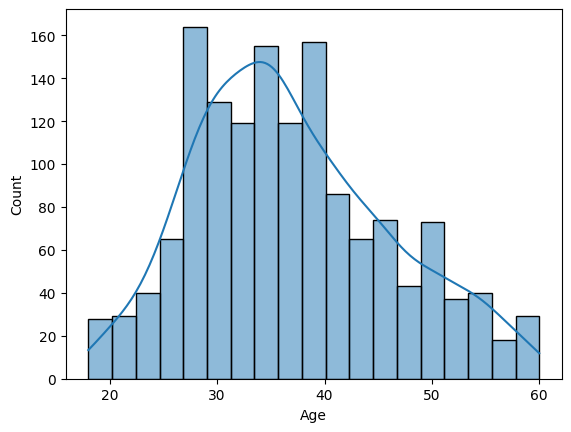

In [13]:
sns.histplot(x=df['Age'], kde=True)

### Box Plot
Plot dibawah ini untuk melihat persebaran data (statistik) dari Pemasukan Bulanan Pegawai di Perusahaan

<Axes: >

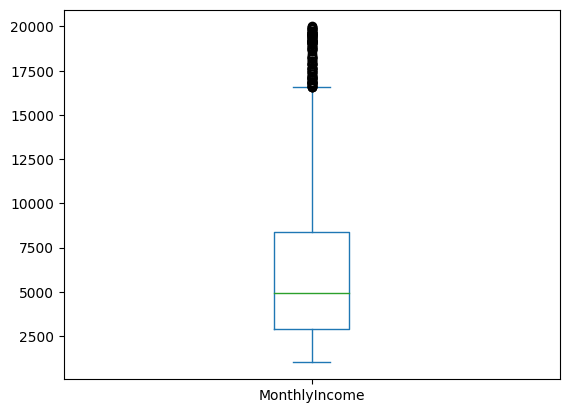

In [14]:
df['MonthlyIncome'].plot(kind='box')

### Line Chart
Chart dibawah untuk melihat perkembangan besaran gaji terhadap umur pegawai yang ada pada perusahaan.

<Axes: xlabel='Age'>

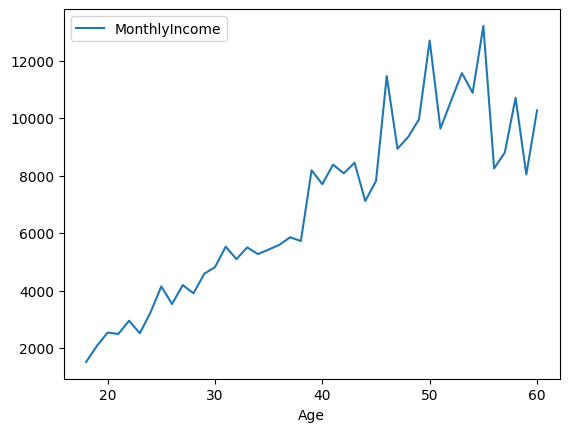

In [37]:
MonthlyIncome_AVG = df.groupby(['Age'])['MonthlyIncome'].mean().reset_index()
MonthlyIncome_AVG
MonthlyIncome_AVG.plot(kind='line',x="Age",y="MonthlyIncome")


## Conclusion
Berdasarkan beberapa chart yang telah dibuat, pada umumnya pegawai pada perusahaan tersebut memiliki kepuasan terhadap pekerjaannya. 

Hal ini didukung dengan melihat persebaran Kepuasaan Pegawai atas Pekerjaannya jika dibandingkan dengan Gaji Bulanan, Departmentnya, serta Gendernya dimana 60% dari pegawai memiliki kepuasan pegawai diatas 2.

Tetapi jika kita melihat pada chart Department terhadap Kepuasaan Pegawai, dapat dilihat bahwa pada Department Human Resource memiliki kecenderungan nilai Kepuasaan yang rendah secara persentil jika dibandingkan dengan Department lainnya.